In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import fastai
from fastai.vision import *
from pathlib import Path
from skimage.io import imread,imsave,imshow
import warnings
from collections import defaultdict
import pandas as pd

In [3]:
from tqdm import tqdm_notebook as tqdm
import os
import gc
import torch

In [4]:
def clean_instance():
    gc.collect()
    torch.cuda.empty_cache()

In [5]:
clean_instance()

In [6]:
os.sched_getaffinity(0)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}

In [7]:
os.cpu_count()

16

In [8]:
from fastai.callbacks import *
from torchvision.models import *
from mxresnet import *
from functools import partial
from ranger import *

Mish activation loaded...


In [9]:
!ls ../data/imgs

models	train_0  train_1  train_2  train_3


In [10]:
img_dat_pth = Path('../data/imgs/train_0')

In [11]:
trn_df = pd.read_csv("../data/train.csv",index_col="image_id")

In [12]:
trn_df.head(5)

,grapheme_root,vowel_diacritic,consonant_diacritic,grapheme
image_id,,,,
Train_0,15,9,5,ক্ট্রো
Train_1,159,0,0,হ
Train_2,22,3,5,খ্রী
Train_3,53,2,2,র্টি
Train_4,71,9,5,থ্রো


In [13]:
trn_df.iloc[:5,[0,1,2]]

,grapheme_root,vowel_diacritic,consonant_diacritic
image_id,,,
Train_0,15,9,5
Train_1,159,0,0
Train_2,22,3,5
Train_3,53,2,2
Train_4,71,9,5


In [14]:
a = trn_df.loc['Train_0'].values

In [15]:
def lbl_from_img_pth(pth):
    #get fn from path
    #idex into df and get values
    fn = pth.stem
    _ = trn_df.loc[fn].values
    return _[0].astype(np.long)

In [16]:
tfms = get_transforms(flip_vert=False, do_flip=False,max_lighting=0.1, max_zoom=1.05, max_warp=0.1)

In [16]:
# what loss function
data = (ImageList.from_folder(img_dat_pth)
       .split_by_rand_pct()
       .label_from_func(lbl_from_img_pth)
       .transform(tfms,size=(137,236))
       .databunch(bs=32))

In [49]:
_ = data.train_ds[1]

In [50]:
_[1].data

151

In [17]:
arch = models.resnet34

In [18]:
learn = cnn_learner(data,arch,metrics=[accuracy,Precision(),Recall()])

In [25]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


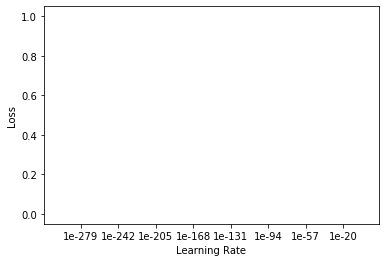

In [26]:
learn.recorder.plot()

In [55]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,precision,recall,time
0,2.722723,2.474806,0.375423,nan,0.234315,01:35


/home/ravi/Documents/fastai_v2_repo/fastai/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")


In [59]:
learn.fit_one_cycle(12)

epoch,train_loss,valid_loss,accuracy,precision,recall,time
0,2.469199,2.174728,0.445429,nan,0.308309,01:35
1,2.227070,1.789690,0.512846,nan,0.390414,01:39
2,1.956395,1.461577,0.598785,nan,0.471943,01:42
3,1.684724,1.195139,0.666102,nan,0.555571,01:44
4,1.384065,1.037344,0.706035,nan,0.587188,01:45
5,1.284232,0.919853,0.738598,nan,0.649511,01:46
6,1.302038,0.863601,0.750050,nan,0.664944,01:47
7,1.137015,0.790332,0.774547,nan,0.700819,01:47
8,1.049446,0.753694,0.785501,nan,0.720090,01:48
9,0.948303,0.718641,0.792671,nan,0.725420,01:48


In [60]:
learn.save("first")

In [ ]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,precision,recall,time
0,0.996158,0.767309,0.779825,nan,0.710365,01:36
1,1.169110,0.808509,0.764390,nan,0.685673,01:43


In [20]:
learn.load("first");

In [21]:
learn.unfreeze()

In [22]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


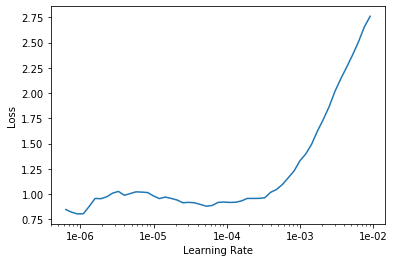

In [23]:
learn.recorder.plot()

In [24]:
learn.fit_one_cycle(10,1e-4)

epoch,train_loss,valid_loss,accuracy,precision,recall,time
0,0.946862,0.534821,0.839275,nan,0.783138,02:15
1,0.692943,0.529973,0.843059,nan,0.764495,02:30
2,0.627683,0.427042,0.879805,nan,0.835934,02:36
3,0.491297,0.360214,0.895140,0.898221,0.859232,02:39
4,0.358056,0.308228,0.913463,0.904110,0.887363,02:43
5,0.291385,0.260808,0.926210,0.914889,0.906696,02:45
6,0.206432,0.253462,0.928998,0.921904,0.913160,02:51
7,0.177174,0.235944,0.938857,0.929264,0.925235,02:47
8,0.103325,0.227941,0.941346,0.939745,0.923167,02:47
9,0.074814,0.226603,0.942043,0.938843,0.924453,02:47


/home/ravi/Documents/fastai_v2_repo/fastai/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")


In [25]:
learn.save('unfrozen')

In [ ]:
#check model, it is not what is expected